In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table
import sys

In [3]:

# Add the path to the 'scripts' folder directly
sys.path.append('/Users/mncavieres/Documents/2024-2/HVS')


# Now you can import from the 'scripts' package
from scripts.implied_d_vr import *  # Or import any other module
from scripts.selections import *
from scripts.CMD_selection import *

/Users/mncavieres/opt/anaconda3/envs/speedytest2/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [4]:

# set up the plotting
# set font size
plt.rcParams.update({'font.size': 18})
# set the figure size
plt.rcParams.update({'figure.figsize': (10, 7)})
# set the font to latex
plt.rcParams.update({'text.usetex': True})

# Enable LaTeX rendering
plt.rc('text', usetex=True)


In [5]:
data = pd.read_csv('/Users/mncavieres/Documents/2024-2/HVS/Data/CMD_training_catalogs/kappa_1.7_speedystar_with_probabilities.csv')

In [6]:
data_hvs = data.loc[data['is_hvs'] == 1]

In [7]:
data_background = data.loc[data['is_hvs'] == 0]

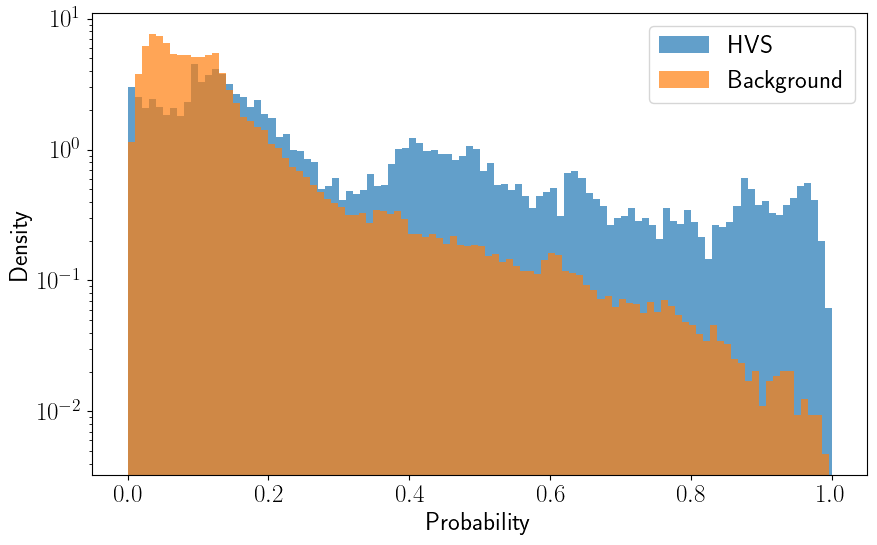

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(data_hvs['p_hvs'], bins=100, alpha=0.7, label='HVS', density=True)
plt.hist(data_background['p_hvs'], bins=100, alpha=0.7, label='Background', density=True)
plt.xlabel('Probability')
plt.ylabel('Density')
plt.yscale('log')
plt.legend()
plt.show()

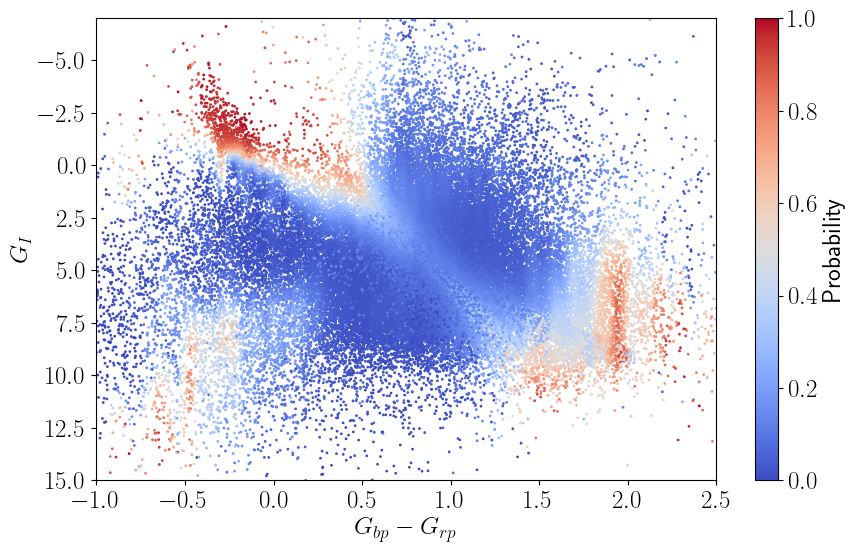

In [9]:
# plot the CMD
plt.figure(figsize=(10, 6))
plt.scatter(data['bp_rp_corr'], data['implied_M_g_corr'], s=1,c = data['p_hvs'], cmap ='coolwarm')
#plt.scatter(data_hvs['bp_rp_corr'], data_hvs['implied_M_g_corr'], s=1, label='HVS')
#plt.scatter(data_background['bp_rp_corr'] , data_background['implied_M_g_corr'], s=1, label='Background')
plt.colorbar(label='Probability')
plt.xlim(-1, 2.5)
plt.ylim( 15, -7)
plt.xlabel('$G_{bp} - G_{rp}$')
plt.ylabel('$G_{I}$')

plt.show()


In [10]:
# compute contamination ratio for different probability thresholds
thresholds = np.linspace(0, 1, 1000)
contamination = []
completeness = []
for threshold in thresholds:
    hvs = data_hvs.loc[data_hvs['p_hvs'] > threshold]
    background = data_background.loc[data_background['p_hvs'] > threshold]
    if len(hvs) + len(background) == 0:
        contamination.append(0)
        continue
    contamination.append(len(background) / (len(hvs) + len(background)))
    completeness.append(len(hvs) / len(data_hvs))


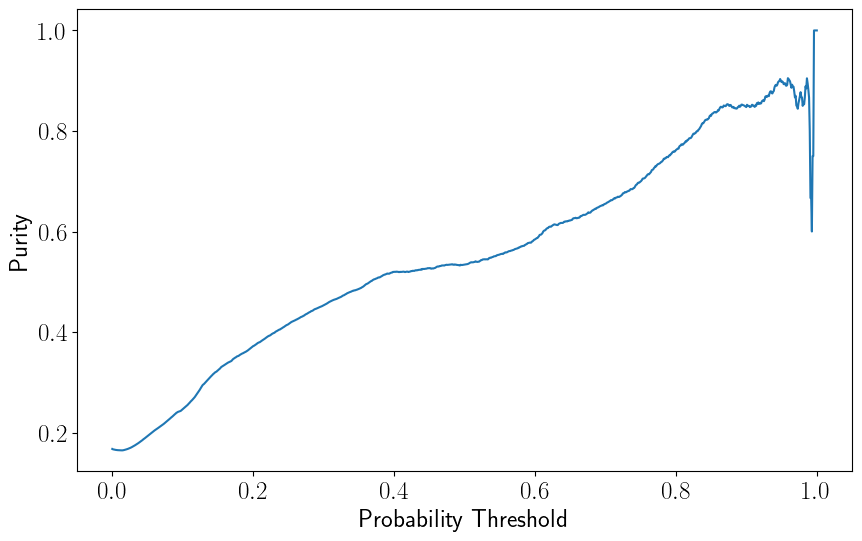

In [11]:
# plot the contamination ratio as a function of the probability threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, 1- np.array(contamination))
plt.xlabel('Probability Threshold')
plt.ylabel('Purity')
plt.show()

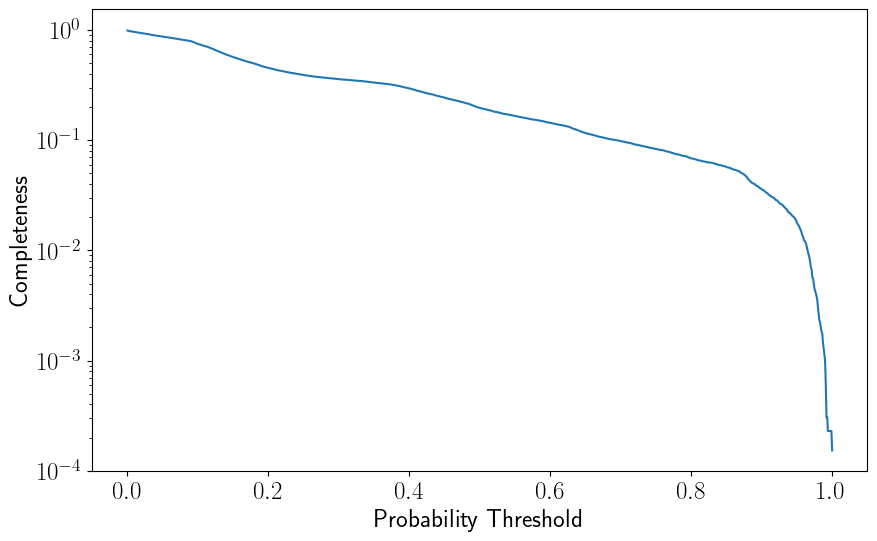

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds[1:], np.array(completeness))
plt.xlabel('Probability Threshold')
plt.ylabel('Completeness')
plt.yscale('log')
plt.show()

## Using Verberne et al. 2024 expected HVS in Gaia

The number of HVSs in Gaia is expected to be between 5 and 45 at the $1 \sigma$ level. If we are optimistic, and assume that there are 45, how many do we expect to exist for a given probability threshold

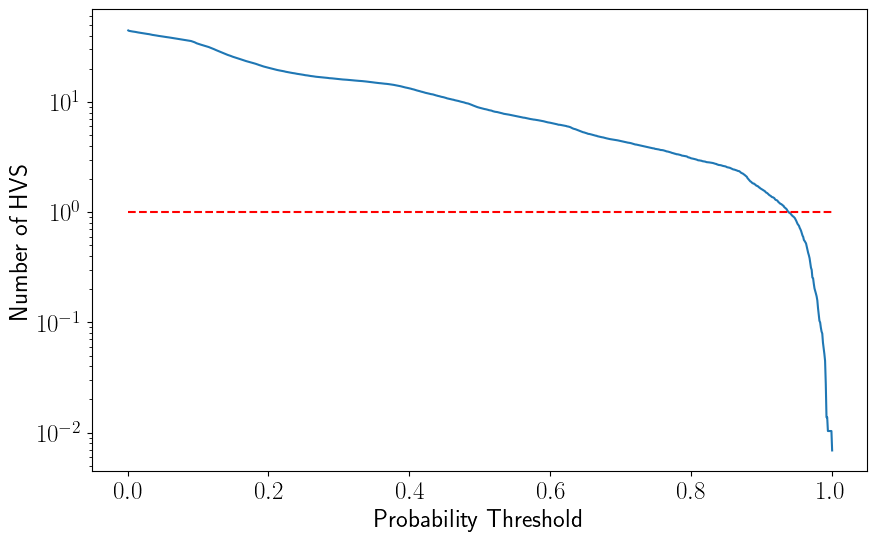

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds[1:], 45*np.array(completeness))
plt.hlines(1, 0, 1, color='red', linestyle='--')
plt.xlabel('Probability Threshold')
plt.ylabel('Number of HVS')
plt.yscale('log')

plt.show()

# Using a given ejection rate

If we assume for example an ejection rate of $\nu = 10^{-5} yr^{-1}$ and that all of the HVS ejected have not gone supernovae, then the total number of stars will be $\nu*13 \times 10^9 yr$ 

In [14]:
nu = 1e-5
age_of_universe = 13.8e9
hvs_in_universe = nu * age_of_universe

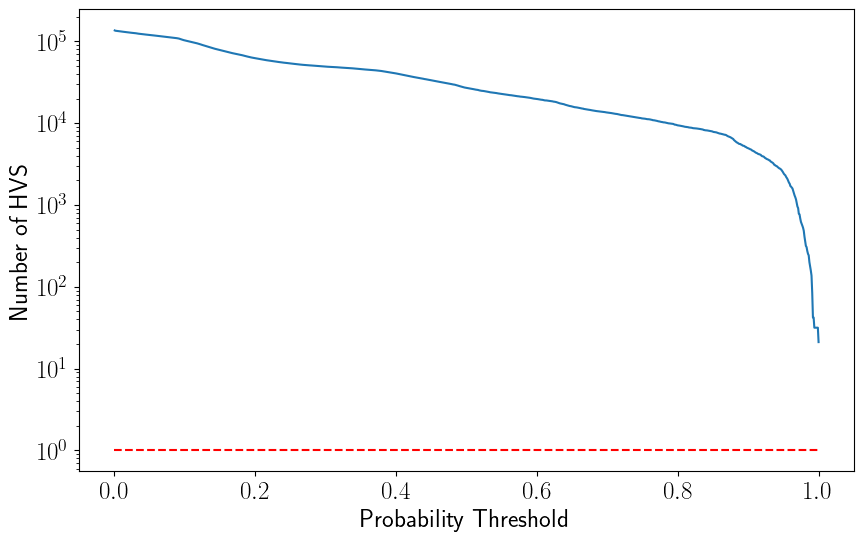

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds[1:], hvs_in_universe*np.array(completeness))
plt.hlines(1, 0, 1, color='red', linestyle='--')
plt.xlabel('Probability Threshold')
plt.ylabel('Number of HVS')
plt.yscale('log')

plt.show()

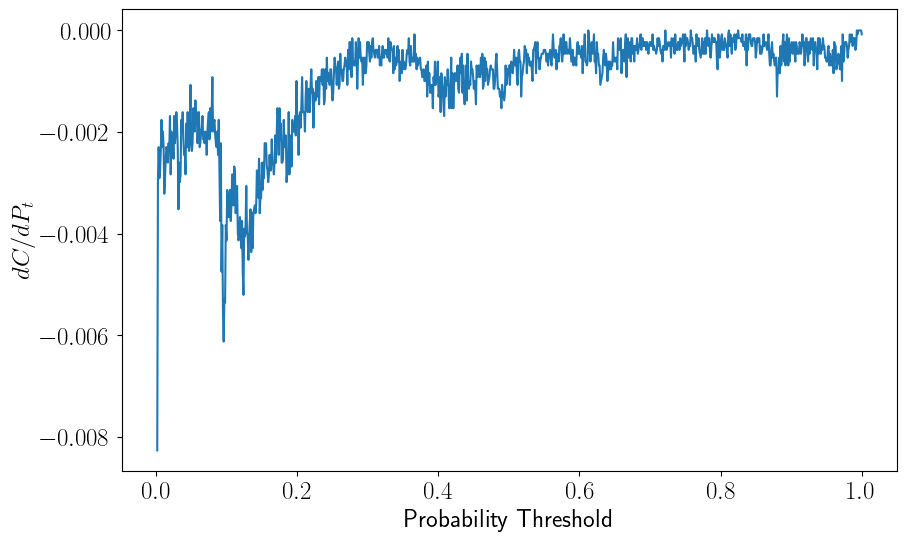

In [16]:
# plot the derivative of completeness
plt.figure(figsize=(10, 6))
plt.plot(thresholds[2:], np.diff(completeness))
plt.xlabel('Probability Threshold')
plt.ylabel('$dC/dP_t$')
plt.show()

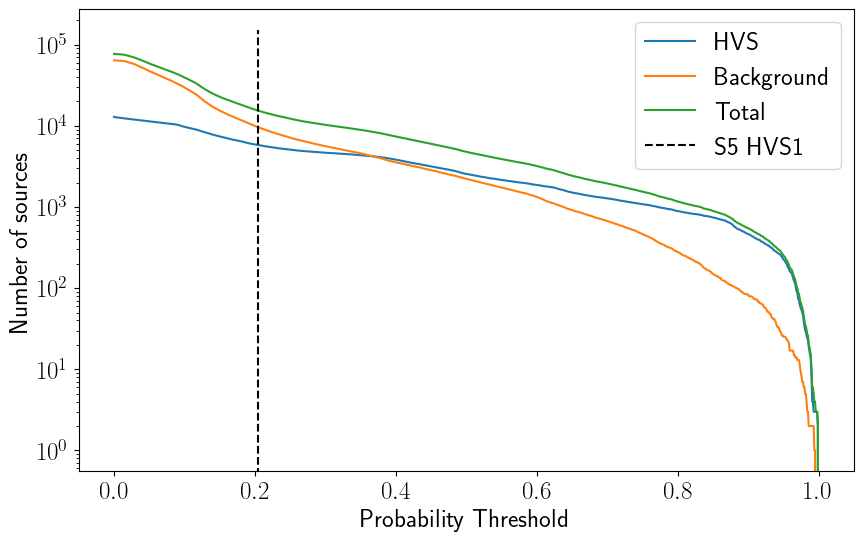

In [17]:
# plot the number of selected sources as a function of probability threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, [len(data_hvs.loc[data_hvs['p_hvs'] > threshold]) for threshold in thresholds], label='HVS')
plt.plot(thresholds, [len(data_background.loc[data_background['p_hvs'] > threshold]) for threshold in thresholds], label='Background')
plt.plot(thresholds, [len(data.loc[data['p_hvs'] > threshold]) for threshold in thresholds], label='Total')
plt.vlines(0.2038398916151273, 0, 1.5e5, linestyle='--', color='black', label = 'S5 HVS1')
plt.xlabel('Probability Threshold')
plt.ylabel('Number of sources')
plt.yscale('log')
plt.legend()
plt.show()

# Probability threshold for 10% completeness

In [23]:
# interpolate completeness to see the probability threshold for 10% completeness
from scipy.interpolate import interp1d
f = interp1d(completeness, thresholds[1:])
completeness_we_want = 0.05
print(f'We retain {completeness_we_want} of HVS if we apply a threshold',f(completeness_we_want))


We retain 0.05 of HVS if we apply a threshold 0.8723223223223223


# S5 HVS1

In [58]:
s5_hvs1 = Table.read('/Users/mncavieres/Documents/2024-2/HVS/Data/Gaia_tests/s5hvs1-result_with_probabilities.fits')

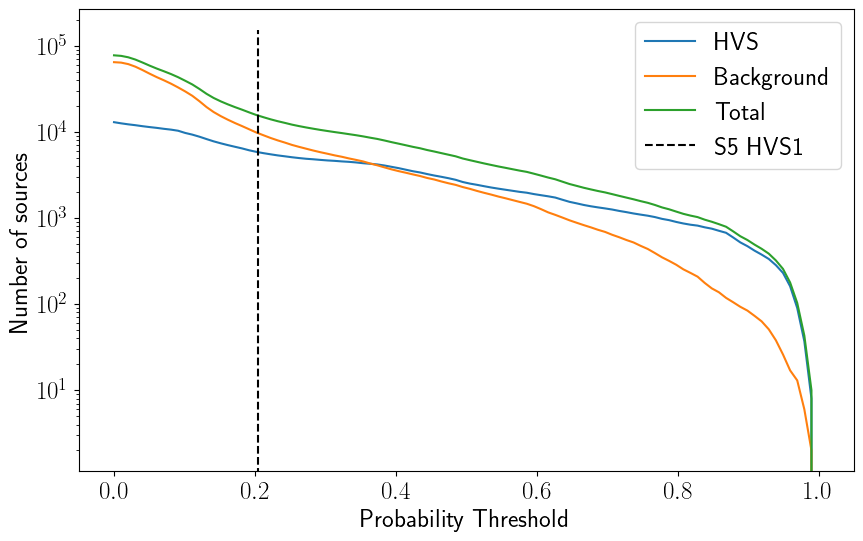

In [59]:
# plot the number of selected sources as a function of probability threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, [len(data_hvs.loc[data_hvs['p_hvs'] > threshold]) for threshold in thresholds], label='HVS')
plt.plot(thresholds, [len(data_background.loc[data_background['p_hvs'] > threshold]) for threshold in thresholds], label='Background')
plt.plot(thresholds, [len(data.loc[data['p_hvs'] > threshold]) for threshold in thresholds], label='Total')
plt.vlines(s5_hvs1['p_hvs'], 0, 1.5e5, linestyle='--', color='black', label = 'S5 HVS1')
plt.xlabel('Probability Threshold')
plt.ylabel('Number of sources')
plt.yscale('log')
plt.legend()
plt.show()

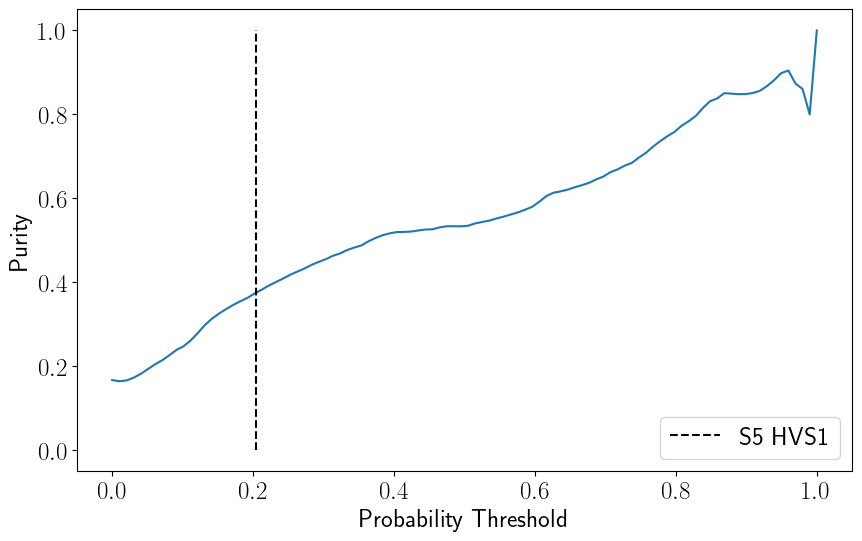

In [62]:
# plot the contamination ratio as a function of the probability threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, 1- np.array(contamination))
plt.vlines(s5_hvs1['p_hvs'], 0, 1, linestyle='--', color='black', label = 'S5 HVS1')
plt.xlabel('Probability Threshold')
plt.ylabel('Purity')
plt.legend(loc='lower right')
plt.show()

In [69]:
# interpolate the purity for the S5 HVS1 probability
purities = 1 - np.array(contamination)
purity_s5hvs1 = np.interp(s5_hvs1['p_hvs'], thresholds, purities)
print('Purity for S5 HVS1:', purity_s5hvs1[0])

Purity for S5 HVS1: 0.3752727767639954


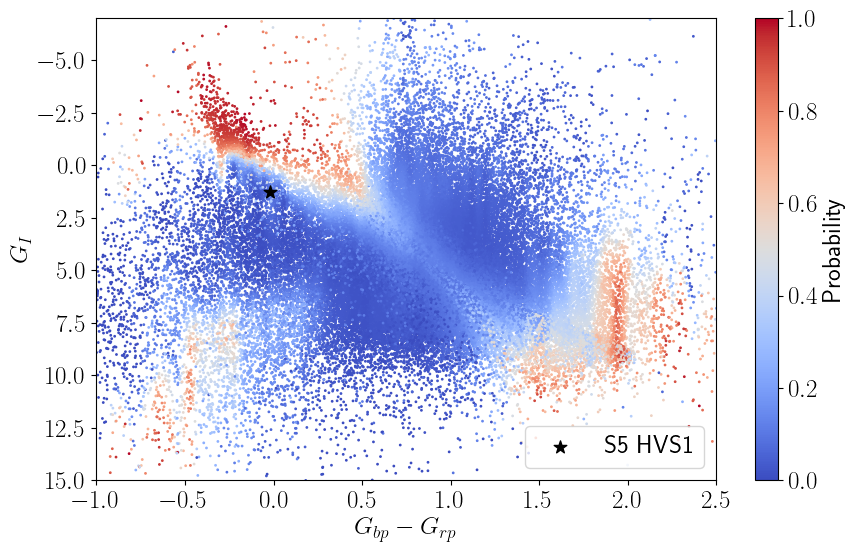

In [79]:
# plot the CMD
plt.figure(figsize=(10, 6))
cbar = plt.scatter(data['bp_rp_corr'], data['implied_M_g_corr'], s=1,c = data['p_hvs'], cmap ='coolwarm')
#plt.scatter(data_hvs['bp_rp_corr'], data_hvs['implied_M_g_corr'], s=1, label='HVS')
#plt.scatter(data_background['bp_rp_corr'] , data_background['implied_M_g_corr'], s=1, label='Background')
plt.scatter(s5_hvs1['bp_rp_corr'], s5_hvs1['implied_M_g_corr'], marker='*', s=90, label='S5 HVS1', color='black')
plt.colorbar(cbar, label='Probability')
plt.xlim(-1, 2.5)
plt.ylim( 15, -7)
plt.xlabel('$G_{bp} - G_{rp}$')
plt.ylabel('$G_{I}$')
plt.legend()
plt.show()
